# Taller 7
Métodos Computacionales para Políticas Públicas - URosario

**Entrega: viernes 23-oct-2020 11:59 PM**

<div class="alert alert-success">

**[Nicolás Garcés R]** <br><br>

[nicolas.garces@urosario.edu.co]
</div>

## Instrucciones:
- Guarde una copia de este *Jupyter Notebook* en su computador, idealmente en una carpeta destinada al material del curso.
- Modifique el nombre del archivo del *notebook*, agregando al final un guión inferior y su nombre y apellido, separados estos últimos por otro guión inferior. Por ejemplo, mi *notebook* se llamaría: mcpp_taller7_santiago_matallana
- Marque el *notebook* con su nombre y e-mail en el bloque verde arriba. Reemplace el texto "[Su nombre acá]" con su nombre y apellido. Similar para su e-mail.
- Desarrolle la totalidad del taller sobre este *notebook*, insertando las celdas que sea necesario debajo de cada pregunta. Haga buen uso de las celdas para código y de las celdas tipo *markdown* según el caso.
- Recuerde salvar periódicamente sus avances.
- Cuando termine el taller:
    1. Descárguelo en PDF. Si tiene algún problema con la conversión, descárguelo en HTML.
    2. Suba todos los archivos a su repositorio en GitHub, en una carpeta destinada exclusivamente para este taller, antes de la fecha y hora límites.

(Todos los ejercicios tienen el mismo valor.)

---

En este taller exploraremos los datos de crimen de Chicago. 

Descargue los datos de crimen del Chicago Data Portal solo para el año 2015 (https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2/data).

---

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
file = "data.csv"
data= pd.read_csv(file, parse_dates=['Date'])
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12178711,JD382455,2015-01-01 00:01:00,050XX W HURON ST,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,RESIDENCE,False,True,...,37.0,25,02,NaN,NaN,2015,09/29/2020 03:53:23 PM,NaN,NaN,NaN
1,11534293,JB550914,2015-01-01 00:01:00,066XX N ASHLAND AVE,1754,OFFENSE INVOLVING CHILDREN,AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY M...,RESIDENCE,False,True,...,49.0,1,02,NaN,NaN,2015,09/22/2020 03:45:08 PM,NaN,NaN,NaN
2,11301637,JB240162,2015-01-01 00:01:00,050XX W CONGRESS PKWY,1753,OFFENSE INVOLVING CHILDREN,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,RESIDENCE,False,False,...,29.0,25,02,NaN,NaN,2015,09/01/2020 03:52:46 PM,NaN,NaN,NaN
3,11417467,JB397888,2015-01-01 00:01:00,074XX S PARNELL AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,True,...,6.0,68,17,1173836.0,1855526.0,2015,06/21/2020 03:46:31 PM,41.758972,-87.638464,"(41.758972076, -87.638463818)"
4,11340858,JB297571,2015-01-01 00:01:00,055XX W WASHINGTON BLVD,0266,CRIMINAL SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,False,...,29.0,25,02,NaN,NaN,2015,05/04/2020 03:47:28 PM,NaN,NaN,NaN


### 1.
Calcule el número de crímenes en cada Community Area en 2015. Haga un gráfico de barras que lo ilustre.

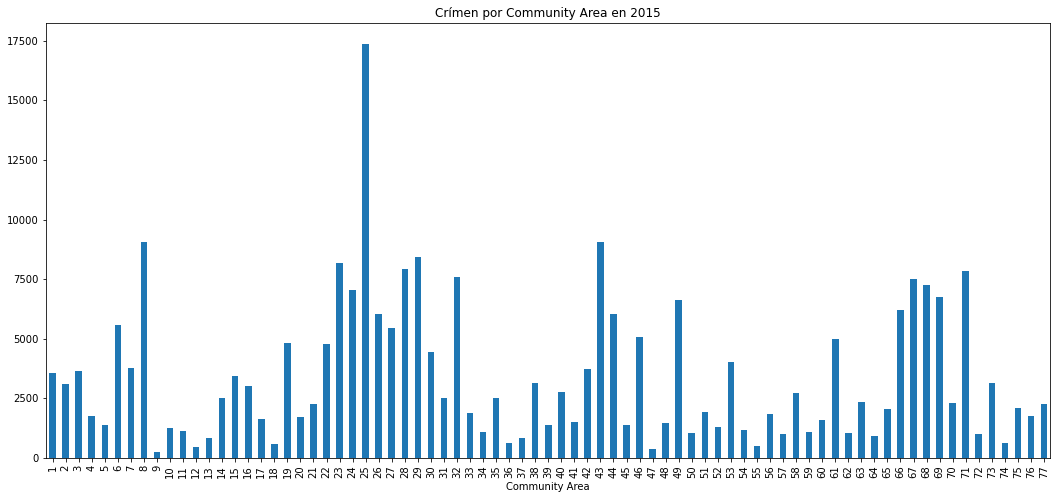

In [62]:
dca = data.groupby('Community Area')
dca = dca['ID'].agg('count')
plt.rcParams["figure.figsize"] = [18.0, 8.0]
dca.plot(kind='bar')
plt.title("Crímen por Community Area en 2015")
plt.show();

### 2.
Ordene las Community Areas de acuerdo con el número de crímenes. ¿Qué Community Area (por nombre, idealmente) presenta el mayor número de crímenes? ¿El menor?

In [4]:
names = pd.DataFrame([{'Community Area':77,'Community Name':'Edgewater'},{'Community Area':66 ,'Community Name':'Chicago Lawn'}
                      ,{'Community Area':44,'Community Name':'Chatham'},{'Community Area':16,'Community Name':'Irving Park'}
                      ,{'Community Area':24,'Community Name':'West Town'},{'Community Area':71,'Community Name':'Auburn Gresham'}
                      ,{'Community Area':39,'Community Name':'Kenwood'},{'Community Area':1,'Community Name':'Rogers Park'}
                      ,{'Community Area':50,'Community Name':'Pullman'},{'Community Area':45,'Community Name':'Avalon Park'}
                      ,{'Community Area':22,'Community Name':'Logan Square'},{'Community Area':2,'Community Name':'West Ridge'}
                      ,{'Community Area':4,'Community Name':'Lincoln Square'},{'Community Area':5,'Community Name':'North Center'}
                      ,{'Community Area':10,'Community Name':'Norwood Park'},{'Community Area':15,'Community Name':'Portage Park'}
                      ,{'Community Area':70,'Community Name':'Ashburn'},{'Community Area':19,'Community Name':'Belmont Cragin'}
                      ,{'Community Area':20,'Community Name':'Hermosa'},{'Community Area':69,'Community Name':'Greater Grand Crossing'}
                      ,{'Community Area':27,'Community Name':'East Garfield Park'},{'Community Area':29,'Community Name':'North Lawndale'}
                      ,{'Community Area':30,'Community Name':'South Lawndale'},{'Community Area':68,'Community Name':'Englewood'}
                      ,{'Community Area':32,'Community Name':'Loop'},{'Community Area':35,'Community Name':'Douglas'}
                      ,{'Community Area':54,'Community Name':'Riverdale'},{'Community Area':40,'Community Name':'Washington Park'}
                      ,{'Community Area':31,'Community Name': 'Lower West Side'},{'Community Area':76,'Community Name': 'Hare'}
                     ,{'Community Area':75,'Community Name': 'Morgan Park'},{'Community Area':74,'Community Name': 'Mount Greenwood'}
                     ,{'Community Area':73,'Community Name': 'Washington Heights'},{'Community Area':72,'Community Name': 'Beverly'}
                     ,{'Community Area':67,'Community Name': 'West Englewood'},{'Community Area':65,'Community Name': 'West Lawn'}
                     ,{'Community Area':64,'Community Name': 'Clearing'},{'Community Area':63,'Community Name': 'Gage Park'}
                     ,{'Community Area':62,'Community Name': 'West Elsdon'},{'Community Area':61,'Community Name': 'New City'}
                     ,{'Community Area':60,'Community Name': 'Bridgeport'},{'Community Area':59,'Community Name': 'McKinley Park'}
                     ,{'Community Area':58,'Community Name': 'Brighton Park'},{'Community Area':57,'Community Name': 'Archer Heights'}
                     ,{'Community Area':56,'Community Name': 'Garfield Ridge'},{'Community Area':55,'Community Name': 'Hegewisch'}
                     ,{'Community Area':53,'Community Name': 'West Pullman'},{'Community Area':52,'Community Name': 'East Side'}
                     ,{'Community Area':51,'Community Name': 'South Deering'},{'Community Area':49,'Community Name': 'Roseland'}
                     ,{'Community Area':48,'Community Name': 'Calumet Heights'},{'Community Area':47,'Community Name': 'Burnside'}
                     ,{'Community Area':46,'Community Name': 'South Chicago'},{'Community Area':43,'Community Name': 'South Shore'}
                     ,{'Community Area':42,'Community Name': 'Woodlawn'},{'Community Area':41,'Community Name': 'Hyde Park'}
                     ,{'Community Area':38,'Community Name': 'Grand Boulevard'},{'Community Area':37,'Community Name': 'Fuller Park'}
                     ,{'Community Area':36,'Community Name': 'Oakland'},{'Community Area':34,'Community Name': 'Armour Square'}
                     ,{'Community Area':33,'Community Name': 'Near South Side'},{'Community Area':28,'Community Name': 'Near West Side'}
                     ,{'Community Area':26,'Community Name': 'West Garfield Park'},{'Community Area':25,'Community Name': 'Austin'}
                     ,{'Community Area':23,'Community Name': 'Humboldt Park'},{'Community Area':21,'Community Name': 'Avondale'}
                     ,{'Community Area':18,'Community Name': 'Montclare'},{'Community Area':17,'Community Name': 'Dunning'}
                     ,{'Community Area':14,'Community Name': 'Albany Park'},{'Community Area':13,'Community Name': 'North Park'}
                     ,{'Community Area':12,'Community Name': 'Forest Glen'},{'Community Area':11,'Community Name': 'Jefferson Park'}
                     ,{'Community Area':9,'Community Name': 'Edison Park'},{'Community Area':8,'Community Name': 'Near North Side'}
                     ,{'Community Area':7,'Community Name': 'Lincoln Park'},{'Community Area':6,'Community Name': 'Lake View'}
                     ,{'Community Area':3,'Community Name': 'Uptown'}])

In [5]:
data = pd.merge(data, names, how='right', left_on='Community Area', right_on='Community Area')

data['Date']

0        2015-01-01 00:01:00
1        2015-01-01 00:01:00
2        2015-01-01 00:01:00
3        2015-01-01 00:01:00
4        2015-01-01 00:01:00
                 ...        
263681   2015-12-27 20:00:00
263682   2015-12-27 22:30:00
263683   2015-12-28 13:30:00
263684   2015-12-28 13:30:00
263685   2015-12-29 23:00:00
Name: Date, Length: 263686, dtype: datetime64[ns]

In [6]:
data = data.fillna(0)

In [7]:
dca = data.groupby('Community Area')
dca = dca['ID'].agg('count')
dca = pd.merge(dca, names, how='right', left_on='Community Area', right_on='Community Area')
two= dca[['Community Name', 'ID']]
two.sort_values(by='ID',ascending=False)

,Community Name,ID
24,Austin,17371
42,South Shore,9082
7,Near North Side,9054
28,North Lawndale,8416
22,Humboldt Park,8193
...,...,...
17,Montclare,585
54,Hegewisch,515
11,Forest Glen,448
46,Burnside,389


Austin es la community con mas crimenes en 2015. la comunity con menos es Edison Park.

### 3.
Cree una tabla cuyas filas sean días del año (yyyy-mm-dd) y las columnas las 77 Community Areas. En cada campo de la tabla deberá haber el correspondiente número de crímenes. Seleccione algunas Community Areas que le llamen la atención y haga un gráfico de serie de tiempo.

Pista: El siguiente código puede serle útil.

In [74]:
# Create function to strip time from date field, and use it to create another column
def to_day(timestamp):
    return timestamp.replace(minute=0,hour=0, second=0)

data['Days']= data['Date'].apply(to_day)
col_list = ['Days','Community Name','ID']
tree = data[col_list]
tree.head()

,Days,Community Name,ID
0,2015-01-01,Austin,12178711
1,2015-01-01,Austin,11301637
2,2015-01-01,Austin,11340858
3,2015-01-01,Austin,11340854
4,2015-01-01,Austin,10903354


In [75]:
tree = tree.groupby(['Community Name','Days']).agg('count')
tabla = tree.unstack('Community Name')
tabla = tabla.fillna(0)
tabla.head()

ID                                       \
Community Name Albany Park Archer Heights Armour Square Ashburn   
Days                                                              
2015-01-01             6.0            3.0           6.0     9.0   
2015-01-02             2.0            6.0           1.0     6.0   
2015-01-03             6.0            4.0           2.0     8.0   
2015-01-04             4.0            2.0           4.0     9.0   
2015-01-05             8.0            1.0           3.0     8.0   

                                                                          \
Community Name Auburn Gresham Austin Avalon Park Avondale Belmont Cragin   
Days                                                                       
2015-01-01               46.0   88.0         6.0     11.0           20.0   
2015-01-02               17.0   54.0         3.0      5.0            9.0   
2015-01-03               18.0   55.0         6.0      7.0            8.0   
2015-01-04               12.0   33.0         4.0      4.0            4.0   
2015-01-05               17.0   36.0         1.0      4.0           10.0   

                        ...                                                 \
Community Name Beverly  ... Washington Heights Washington Park West Elsdon   
Days                    ...                                                  
2015-01-01         3.0  ...                9.0            11.0         1.0   
2015-01-02         1.0  ...               11.0             6.0         3.0   
2015-01-03         0.0  ...                8.0             7.0         0.0   
2015-01-04         1.0  ...                5.0             5.0         3.0   
2015-01-05         0.0  ...                5.0             4.0         2.0   

                                                                         \
Community Name West Englewood West Garfield Park West Lawn West Pullman   
Days                                                                      
2015-01-01               29.0               19.0      12.0         17.0   
2015-01-02               15.0               20.0       8.0         14.0   
2015-01-03               18.0               22.0       1.0          9.0   
2015-01-04               15.0               15.0       2.0          4.0   
2015-01-05               23.0               11.0       2.0          7.0   

                                              
Community Name West Ridge West Town Woodlawn  
Days                                          
2015-01-01           11.0      20.0     17.0  
2015-01-02            9.0      15.0     10.0  
2015-01-03           11.0      26.0      8.0  
2015-01-04            7.0      15.0      1.0  
2015-01-05            7.0      10.0      3.0  

[5 rows x 77 columns]

In [ ]:
tabla[["Austin","Edison Park","Montclare","Humboldt Park"]].plot(); # no corre y no se por que.

### 4.

Descargue la base de datos de información socioeconómica (https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2).

Cree una tabla que agregue el número de crímenes por Community Area. Una esa tabla con la de datos socioeconómicos y cree un "scatter plot" de número de crímenes vs ingreso per cápita. Explique la relación en palabras.

In [56]:
file = "data2.csv"
data2= pd.read_csv(file)
data2.head()

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [58]:
final_data= pd.merge(two, data2, how='left', left_on='Community Name', right_on='COMMUNITY AREA NAME')
final_data.head()

,Community Name,ID,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,Rogers Park,3585,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939.0,39.0
1,West Ridge,3110,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040.0,46.0
2,Uptown,3653,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787.0,20.0
3,Lincoln Square,1764,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524.0,17.0
4,North Center,1392,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123.0,6.0


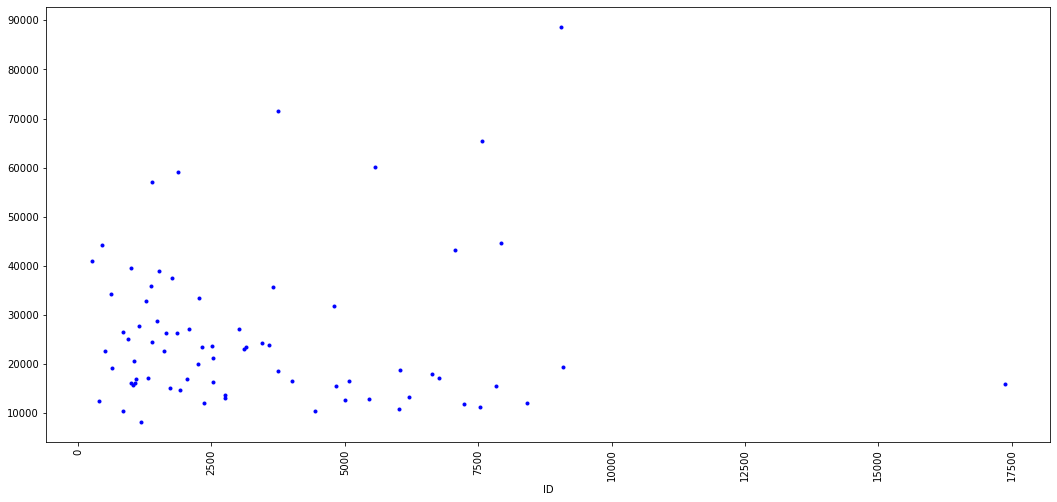

In [73]:

final_data.plot('ID',"PER CAPITA INCOME ", style='.', color='b', legend=False)
plt.xticks(rotation=90)
plt.show()

No hay una relación clara entre crimen e ingreso. Hay una nube de barrios que tienen relativamente bajo crimen e ingresos variados. Después aumenta la varianza y tenemos barrios de ingresos bajos con altos crímenes y unos cuantos barios ricos con numero de crímenes similares. Austin casi que es un outlier con una cantidad de crímenes muy por encima del resto y con ingresos bajo. 


---